In [2]:
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np  
import os

!pip install seaborn
import seaborn as sns

from pandas.api.types import CategoricalDtype
Train_label = pd.read_csv('Training set labels.csv')
Train_value = pd.read_csv('Training set values.csv')
Test_value = pd.read_csv('Test set values.csv')
Train = pd.merge(Train_value,Train_label, how='inner',left_on='id',right_on='id', left_index=False)

In [25]:
# Function to set up # of category for features
test_cat = 8
def max_cat(col):
    if len(Train[col].value_counts()) > (test_cat):
        top_value = Train[col].value_counts()[:(test_cat)].index.tolist()
        Train.loc[-Train[col].isin(top_value),col]='Others'
                
    return Train
        

In [27]:
Train.shape

(59400, 41)

In [ ]:
Train.head()

In [9]:
Train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Cleanning - longitude | latitude
Reference: https://worldpopulationreview.com/country-locations/where-is-tanzania    
latitude :  00°59' - 11°45′ -> should be negative due South Lat  -> -0.59  ~ - 11.45
longitude:  29°10' -  40°29′ East

In [2]:
Train[['longitude','latitude']].describe()

,longitude,latitude
count,59400.000000,5.940000e+04
mean,34.077427,-5.706033e+00
std,6.567432,2.946019e+00
min,0.000000,-1.164944e+01
25%,33.090347,-8.540621e+00
50%,34.908743,-5.021597e+00
75%,37.178387,-3.326156e+00
max,40.345193,-2.000000e-08


In [2]:
long_lat_error =Train[((Train['longitude'] < 29.10)  | (Train['longitude'] > 40.29)) | ((Train['latitude'] < -11.45)  | (Train['latitude'] > -0.59))] 
long_lat_error

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.000000,-2.000000e-08,Muungano,0,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.000000,-2.000000e-08,Polisi,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.000000,-2.000000e-08,Wvt Tanzania,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.000000,-2.000000e-08,Kikundi Cha Wakina Mama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.000000,-2.000000e-08,Kwakisusi,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59208,3631,0.0,2013-01-22,Dwsp,0,DWE,0.000000,-2.000000e-08,Mtakuja,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.000000,-2.000000e-08,Maendeleo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
59322,44114,6000.0,2013-02-14,Unicef,532,UNICEF,36.985457,-1.146723e+01,Misepelo,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional needs repair
59324,748,0.0,2013-01-22,World Vision,0,World Vision,0.000000,-2.000000e-08,Mwazwilo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [3]:
# Correct long_lat_error using mean of corrected  long & lat
long_mean = Train[(Train['longitude'] >= 29.10)  | (Train['longitude'] <= 40.29)]['longitude'].mean()
lat_mean = Train[(Train['latitude'] >= -11.45)  | (Train['latitude'] <= -0.59)]['latitude'].mean()
#long_mean: 34.077426692028794
#lat_mean: -5.706032659626431
                  

In [4]:
Train['longitude'] = np.where(((Train.longitude <29.10 ) | (Train.longitude > 40.29)),long_mean,Train.longitude)
Train['latitude'] = np.where(((Train.latitude < -11.45) | (Train.latitude > -0.59)),lat_mean,Train.latitude)

In [5]:
# Test long_lat_error -> should be zero instance 
long_lat_error =Train[((Train['longitude'] < 29.10)  | (Train['longitude'] > 40.29)) | ((Train['latitude'] < -11.45)  | (Train['latitude'] > -0.59))] 
long_lat_error # zero instance
Train[['longitude','latitude']].describe()

,longitude,latitude
count,59400.000000,59400.000000
mean,35.114020,-5.871996
std,2.571584,2.758860
min,29.607122,-11.449849
25%,33.354079,-8.524319
50%,34.905440,-5.440285
75%,37.173618,-3.398151
max,40.287471,-0.998464


In [8]:
# export long & lat data with status for heatmap
df_long_lat = Train[['longitude','latitude','status_group']]
df_long_lat.to_csv("long_lat_status.csv")

Cleanning - region | region_code
Reference : https://www.worldatlas.com/maps/tanzania
Standerdize region code with region
Reference: https://www.citypopulation.de/en/tanzania/admin/

In [3]:
df_region_error = Train.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)
df_region_error

region_code,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,24,40,60,80,90,99
region,,,,,,,,,,,,,,,,,,,,,
Arusha,0,3024,0,0,0,0,0,0,0,0,...,0,0,0,0,326,0,0,0,0,0
Dar es Salaam,0,0,0,0,0,0,805,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dodoma,2201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Iringa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kagera,0,0,0,0,0,0,0,0,0,0,...,3316,0,0,0,0,0,0,0,0,0
Kigoma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kilimanjaro,0,0,4379,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lindi,0,0,0,0,0,0,0,300,0,0,...,8,0,0,0,0,0,0,1238,0,0
Manyara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1583,0,0,0,0,0,0


In [4]:
df = Train.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)
df.to_csv('region_error.csv')
Train.loc[Train['region_code'] == 24,'region_code'] = 2
Train.loc[(Train['region_code'] == 18 )| (Train['region_code'] == 80),'region_code' ] = 8
Train.loc[(Train['region_code'] == 90 )| (Train['region_code'] == 99),'region_code' ] = 9
Train.loc[(Train['region_code'] == 17) & (Train['region'] == 'Mwanza'),'region_code'] = 19
Train.loc[(Train['region_code'] == 60 )| (Train['region_code'] == 40),'region_code'] = 6
Train.loc[(Train['region_code'] == 5)  & (Train['region'] == 'Tanga') ,'region_code' ] = 4
Train.loc[(Train['region_code'] == 11) & (Train['region'] == 'Shinyanga'),'region_code'] = 17
Train.loc[(Train['region_code'] == 14 )& (Train['region'] == 'Shinyanga'),'region_code'] = 17

df = Train.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)
df
                                    

region_code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21
region,,,,,,,,,,,,,,,,,,,,
Arusha,0,3350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dar es Salaam,0,0,0,0,0,0,805,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodoma,2201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Iringa,0,0,0,0,0,0,0,0,0,0,5294,0,0,0,0,0,0,0,0,0
Kagera,0,0,0,0,0,0,0,3316,0,0,0,0,0,0,0,0,0,0,0,0
Kigoma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2816,0,0,0,0
Kilimanjaro,0,0,4379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lindi,0,0,0,0,0,0,0,1546,0,0,0,0,0,0,0,0,0,0,0,0
Manyara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1583


In [3]:
df_region = Train.pivot_table('id','region','status_group',aggfunc='count')
df_region.to_csv('reg_status.csv')

Cleanning - district_code
code with 0 -> no sense

In [6]:
Train['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [2]:
df_district_error = Train.pivot_table('id','region','district_code',aggfunc='count').fillna(0).astype(int)
# district_code with 0 -> error   
df_district_error


district_code,0,1,2,3,4,5,6,7,8,13,23,30,33,43,53,60,62,63,67,80
region,,,,,,,,,,,,,,,,,,,,
Arusha,0,189,1206,109,0,201,310,1009,0,0,0,326,0,0,0,0,0,0,0,0
Dar es Salaam,0,93,497,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodoma,23,888,0,361,347,358,224,0,0,0,0,0,0,0,0,0,0,0,0,0
Iringa,0,728,530,650,2473,564,0,349,0,0,0,0,0,0,0,0,0,0,0,0
Kagera,0,771,487,402,403,0,88,260,236,0,0,669,0,0,0,0,0,0,0,0
Kigoma,0,874,1159,727,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kilimanjaro,0,595,519,877,1225,620,109,434,0,0,0,0,0,0,0,0,0,0,0,0
Lindi,0,1,7,300,0,0,0,0,0,391,293,0,0,154,291,0,109,0,0,0
Manyara,0,550,274,297,276,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
Train.loc[Train['district_code'] == 0,'district_code'] = 1
df_district = Train.pivot_table('id','region','district_code',aggfunc='count').fillna(0).astype(int) 
df_district

district_code,1,2,3,4,5,6,7,8,13,23,30,33,43,53,60,62,63,67,80
region,,,,,,,,,,,,,,,,,,,
Arusha,189,1206,109,0,201,310,1009,0,0,0,326,0,0,0,0,0,0,0,0
Dar es Salaam,93,497,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodoma,911,0,361,347,358,224,0,0,0,0,0,0,0,0,0,0,0,0,0
Iringa,728,530,650,2473,564,0,349,0,0,0,0,0,0,0,0,0,0,0,0
Kagera,771,487,402,403,0,88,260,236,0,0,669,0,0,0,0,0,0,0,0
Kigoma,874,1159,727,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kilimanjaro,595,519,877,1225,620,109,434,0,0,0,0,0,0,0,0,0,0,0,0
Lindi,1,7,300,0,0,0,0,0,391,293,0,0,154,291,0,109,0,0,0
Manyara,550,274,297,276,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Cleanning - lga 
no errors
Cosider Rural vs Urban - to be visulization

In [3]:
Train["lga"].value_counts() #125

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [15]:
df_lga = Train[["region","lga","status_group"]]
df_lga['status_cat'] = df_lga['status_group'].astype('category')
df_lga['status_group'] = df_lga['status_group'].astype('category')
df_lga.info()
df_lga.info()
df_lga['status_cat']= df_lga['status_group'].cat.codes
df_lga = df_lga.pivot_table(df_lga, index = ['region','lga'], columns = 'status_group',aggfunc= 'count' )
df_lga

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   region        59400 non-null  object  
 1   lga           59400 non-null  object  
 2   status_group  59400 non-null  category
 3   status_cat    59400 non-null  category
dtypes: category(2), object(2)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   region        59400 non-null  object  
 1   lga           59400 non-null  object  
 2   status_group  59400 non-null  category
 3   status_cat    59400 non-null  category
dtypes: category(2), object(2)
memory usage: 1.5+ MB


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


status_cat                                       
status_group        functional functional needs repair non functional
region lga                                                           
Arusha Arusha Rural        875                      48            329
       Arusha Urban         42                       7             14
       Babati                0                       0              0
       Bagamoyo              0                       0              0
       Bahi                  0                       0              0
...                        ...                     ...            ...
Tanga  Tunduru               0                       0              0
       Ukerewe               0                       0              0
       Ulanga                0                       0              0
       Urambo                0                       0              0
       Uyui                  0                       0              0

[2625 rows x 3 columns]

In [16]:
df_lga = pd.DataFrame(df_lga.to_records())
#df_lga.loc[df_lga["lga"].str.contains(("Rural"), case=False)][["region","lga",]]
df_lga.loc[df_lga["lga"].str.contains(("Rural"), case=False)][:]#9552
#df_lga.loc[Train["lga"].str.contains("Urban", case=False)]["lga"] #1683
df_lga.columns[3]

df_lga  = df_lga.rename(columns={"('status_cat', 'functional')":'functional',
                       "('status_cat', 'functional needs repair')":'functional needs repair',
                       "('status_cat', 'non functional')":'non functional'})
df_lga_status = df_lga.loc[df_lga["functional"] != 0]    

df_lga_status 

,region,lga,functional,functional needs repair,non functional
0,Arusha,Arusha Rural,875,48,329
1,Arusha,Arusha Urban,42,7,14
27,Arusha,Karatu,316,1,9
50,Arusha,Longido,200,29,81
65,Arusha,Meru,657,32,320
...,...,...,...,...,...
2552,Tanga,Lushoto,433,59,202
2568,Tanga,Mkinga,224,0,64
2580,Tanga,Muheza,219,0,115
2595,Tanga,Pangani,65,3,237


In [17]:
#Export region_lga for visulization
df_lga_status.to_csv('df_lga_status.csv')


Cleanning - ward
There 2092 uniqu value - consider use function max_cat to pick top value
The Ward Profiles provide demographic information on population by age, households and dwelling types, families, language group, household tenure and period of construction; immigration, mobility, ethnic origin and visible minorities; education and labour force; income and shelter cost. 

In [26]:
Train["ward"].value_counts() #2092
#max_cat('ward')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Cleanning - source | source type | source_calss

In [2]:
# Source #10
Train.groupby('source')['id'].nunique().sort_values(ascending=False)
#10  Combine other & Unknow ;  source vs source_type similar, to consider use source_type for model
Train.pivot_table('id','status_group','source',aggfunc='count').fillna(0).astype(int)

source,dam,hand dtw,lake,machine dbh,other,rainwater harvesting,river,shallow well,spring,unknown
status_group,,,,,,,,,,
functional,253,497,162,5422,126,1386,5465,8324,10592,32
functional needs repair,24,17,12,491,1,314,1221,957,1276,4
non functional,379,360,591,5162,85,595,2926,7543,5153,30


In [3]:
# Source type #7
Train.groupby('source_type')['id'].nunique().sort_values(ascending=False) 
Train.pivot_table('id','status_group','source_type',aggfunc='count').fillna(0).astype(int)

source_type,borehole,dam,other,rainwater harvesting,river/lake,shallow well,spring
status_group,,,,,,,
functional,5919,253,158,1386,5627,8324,10592
functional needs repair,508,24,5,314,1233,957,1276
non functional,5522,379,115,595,3517,7543,5153


In [4]:
# source_class #3 
Train.groupby('source_class')['id'].nunique().sort_values(ascending=False) #3
Train.pivot_table('id','status_group','source_class',aggfunc='count').fillna(0).astype(int)

source_class,groundwater,surface,unknown
status_group,,,
functional,24835,7266,158
functional needs repair,2741,1571,5
non functional,18218,4491,115


In [ ]:
Cleanning -  waterpoint_type  | waterpoint_type_group 

In [8]:
Train.groupby('waterpoint_type')['id'].nunique().sort_values(ascending=False) #7
Train.pivot_table('id','status_group','waterpoint_type',aggfunc='count').fillna(0).astype(int)

waterpoint_type,cattle trough,communal standpipe,communal standpipe multiple,dam,hand pump,improved spring,other
status_group,,,,,,,
functional,84,17726,2235,6,10805,563,840
functional needs repair,2,2260,648,0,1029,85,293
non functional,30,8536,3220,1,5654,136,5247


In [9]:
Train.groupby('waterpoint_type_group')['id'].nunique().sort_values(ascending=False) #6
Train.pivot_table('id','status_group','waterpoint_type_group',aggfunc='count').fillna(0).astype(int)

waterpoint_type_group,cattle trough,communal standpipe,dam,hand pump,improved spring,other
status_group,,,,,,
functional,84,19961,6,10805,563,840
functional needs repair,2,2908,0,1029,85,293
non functional,30,11756,1,5654,136,5247


In [21]:
Train["region"].value_counts()  #21
# len(Train["region"].value_counts())
#max_cat('region')
#Train[Train['region'] =='Others']

21

In [5]:
Train['population'].describe()
#Train['population']

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

<AxesSubplot:xlabel='population', ylabel='Density'>

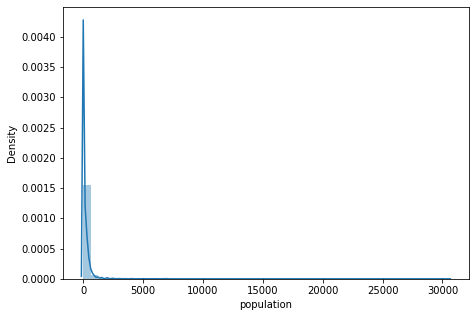

In [6]:
Train[Train['population'] == 0]  # 21381 records  => zero population
#https://worldpopulationreview.com/countries/tanzania-population
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(Train['population']) # left skewed 

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population'>

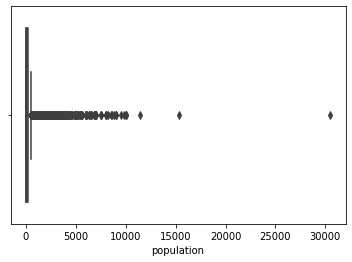

In [16]:
sns.boxplot(Train['population'])

In [1]:
Train[['region','population']]
df_pop = Train.pivot_table('id','region','population',aggfunc='sum').fillna(0).astype(int) 
df_pop['sum'] = df_pop.sum(axis = 1)
df_pop['sum']

NameError: name 'Train' is not defined

In [18]:
#  empirical relations of Normal distribution
upper_limit = Train['population'].mean() + 3*Train['population'].std() # h 1594.3565103804244
lower_limit = Train['population'].mean() - 3*Train['population'].std() # l -1234.536544050458 --> should zero
lower_limit = 0 if lower_limit < 0 else lower_limit
#lower_limit
#upper_limit

# apply the Capping on Outliers
Train['population'] = np.where(Train['population']>upper_limit,upper_limit,
                      np.where(Train['population']<lower_limit,lower_limit,Train['population']))

Train['population'].describe()


count    59400.000000
mean       159.565369
std        281.071681
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max       1594.356510
Name: population, dtype: float64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population'>

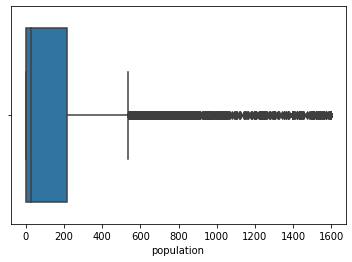

In [19]:
sns.boxplot(Train['population'])

In [12]:
#  Percentile 
upper_limit = Train['population'].quantile(0.99) # h 2000
lower_limit = Train['population'].quantile(0.01) # l -1234.536544050458 --> should zero
lower_limit = 0 if lower_limit < 0 else lower_limit
lower_limit
upper_limit

# apply the Capping on Outliers
Train['population'] = np.where(Train['population']>upper_limit,upper_limit,
                      np.where(Train['population']<lower_limit,lower_limit,Train['population']))

Train['population'].describe()



count    59400.000000
mean       164.056936
std        306.005667
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max       2000.000000
Name: population, dtype: float64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population'>

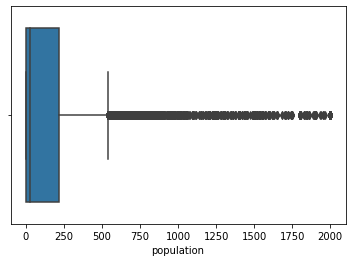

In [13]:
sns.boxplot(Train['population'])

In [19]:
# Inter-Quartile Range (IQR) proximity rule
percentile25 = Train['population'].quantile(0.25)
percentile75 = Train['population'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
lower_limit = 0 if lower_limit < 0 else lower_limit
# apply the Capping on Outliers
Train['population'] = np.where(Train['population']>upper_limit,upper_limit,
                      np.where(Train['population']<lower_limit,lower_limit,Train['population']))

Train['population'].describe()


count    59400.000000
mean       128.424537
std        175.514950
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max        537.500000
Name: population, dtype: float64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population'>

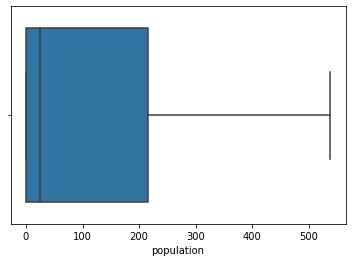

In [20]:
sns.boxplot(Train['population'])